# (02) CIFAR—PoisConv—1

**Motivation**: Testing the effect of ```warm_restart=2```. Archi: ```K = 512``` + CONV enc. Device = ```cuda:1``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 1
device = f'cuda:{device_idx}'

model_type = 'poisson'

## Build model + trainer

In [3]:
cfg_vae, cfg_tr = default_configs('CIFAR10-PATCHES', model_type)
cfg_vae['n_ch'] = 32
cfg_vae['enc_type'] = 'conv'
cfg_vae['enc_bias'] = True
cfg_vae['rmax_q'] = 1.0

cfg_tr['warm_restart'] = 2

print(f"VAE:\n{cfg_vae}\n\nTrainer:\n{cfg_tr}")

VAE:
{'dataset': 'CIFAR10-PATCHES', 'prior_clamp': -3.0, 'prior_log_dist': 'uniform', 'rmax_q': 1.0, 'n_ch': 32, 
'n_latents': 512, 'enc_type': 'conv', 'dec_type': 'lin', 'enc_bias': True, 'dec_bias': False}

Trainer:
{'temp_anneal_portion': 1.0, 'temp_anneal_type': 'exp', 'temp_start': 1.0, 'temp_stop': 0.05, 'lr': 0.005, 
'epochs': 3600, 'batch_size': 1000, 'optimizer_kws': {'weight_decay': 0.0}, 'grad_clip': 500, 'warm_restart': 2}

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|  PoissonVAE |  1.4 Mil   |
|     ---     |    ---     |
|     stem    |    352     |
|     enc     |  1.2 Mil   |
|    fc_enc   |   66.0 K   |
|    fc_dec   |  131.1 K   |
+-------------+------------+

poisson_uniform_c(-3)_rmax(1)_CIFAR10-PATCHES_z-512_k-32_<conv+b|lin>
mc_b1000-ep3600-lr(0.005)_beta(1:0x0.5)_temp(0.05:exp-1)_gr(500)_(2024_05_02,11:26)

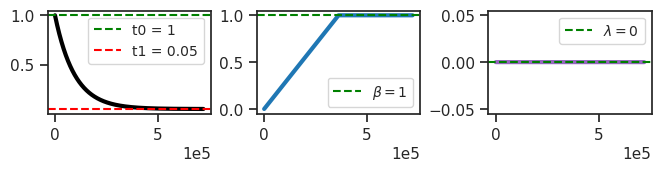

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

vae.print()
print(f"{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n")
tr.show_schedules()

In [5]:
print(vae)

PoissonVAE(
  (mse): MSELoss()
  (stem): Conv2D(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc): Sequential(
    (0): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=32, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (1): Cell(
      (skip): FactorizedReduce(
        (swish): SiLU()
        (ops): ModuleList(
          (0-3): 4 x Conv2D(32, 16, kernel_size=(1, 1), stride=(2, 2))
        )
      )
      (ops): ModuleList(
        (0): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
        (1): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (2): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (3): Cell(
      (skip): FactorizedReduce(
        (swish): SiLU()
        (ops): ModuleList(
          (0-3): 4 x Conv2D(64, 32, kernel_size=(1, 1), stride=(2, 2))
        )
      )
      (ops): ModuleList(
        (0): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
        (1): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=128, out_features=8, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=8, out_features=128, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (4): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=128, out_features=8, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=8, out_features=128, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (5): ResConvPool(
      (act_fn): SiLU()
      (pool): AdaptiveAvgPool2d(output_size=(1, 1))
      (conv): Conv2D(128, 128, kernel_size=(4, 4), stride=(1, 1), padding=valid)
    )
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): ResDenseLayer(
      (fc1): Linear(in_features=128, out_features=1024, bias=True)
      (fc2): Linear(in_features=1024, out_features=128, bias=True)
      (layer_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (drop): Dropout(p=0.1, inplace=False)
      (relu): ReLU()
    )
  )
  (fc_enc): Linear(in_features=128, out_features=512, bias=True)
  (fc_dec): Linear(in_features=512, out_features=256, bias=False)
)

In [6]:
vae.fc_dec.bias, vae.fc_enc.bias.shape

(None, torch.Size([512]))

### Train

In [7]:
# comment = f"..._{tr.cfg.name()}"
comment = tr.cfg.name()
tr.train(comment=comment)

epoch # 3600, avg loss: 160.482878: 100%|█████████████████████| 3600/3600 [5:41:54<00:00,  5.70s/it]


In [7]:
### Was: previous implementation

epoch # 3600, avg loss: 161.466230: 100%|█████████████████████| 3600/3600 [5:08:46<00:00,  5.15s/it]


In [8]:
### Was: mlp enc

epoch # 3600, avg loss: 162.059029: 100%|█████████████████████| 3600/3600 [1:33:46<00:00,  1.56s/it]


In [7]:
### Was: lin enc

epoch # 3600, avg loss: 165.161040: 100%|█████████████████████| 3600/3600 [2:18:41<00:00,  2.31s/it]


### Loss vld (freeze)

In [9]:
data, loss, rates = tr.validate()

_loss = {k: v.mean() for k, v in loss.items()}
_loss['tot'] = _loss['mse'] + _loss['kl']
print(_loss)

{'mse': 128.29515, 'kl': 34.41662, 'kl_diag': 0.067219965, 'tot': 162.71176}

In [9]:
### Was: previous implementation

{'mse': 126.26514, 'kl': 35.51012, 'kl_diag': 0.06935571, 'tot': 161.77525}

In [10]:
### Was: mlp enc

{'mse': 128.40813, 'kl': 35.53672, 'kl_diag': 0.06940766, 'tot': 163.94485}

In [10]:
### Was: lin enc

{'mse': 132.61385, 'kl': 34.6277, 'kl_diag': 0.06763223, 'tot': 167.24155}

### Identify dead neurons

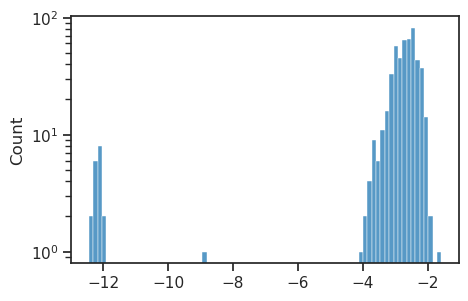

In [168]:
ax = sns.histplot(tonp(vae.log_rates.squeeze()))
ax.set_yscale('log')

In [169]:
dead_thres = 0.01
dead = loss['kl_diag'] < dead_thres
dead.sum()

19

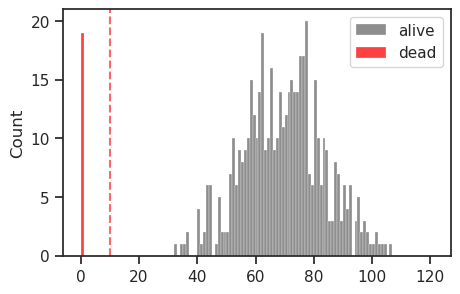

In [170]:
bins = np.linspace(0, 121, 122)
ax = sns.histplot(loss['kl_diag'][~dead] * 1000, bins=bins, color='dimgrey', label='alive')
sns.histplot(loss['kl_diag'][dead] * 1000, bins=bins, color='r', label='dead', ax=ax)
ax.axvline(dead_thres * 1000, color='r', ls='--', alpha=0.6)
ax.locator_params(axis='x', nbins=11)
ax.legend()
plt.show()

### Spike counts

In [22]:
lifetime, population, percents = sparse_score(data['z'][:, ~dead], cutoff=0.05)
print(percents)

{'0': 94.0, '1': 5.2, '2': 0.7, '3+': 0.2}

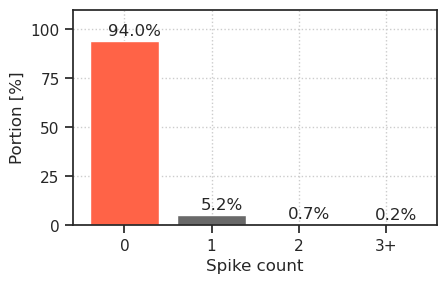

In [23]:
fig, ax = create_figure(1, 1, (4.7, 2.8))

max_val = float(list(percents.values())[0])
ax.set(
    xlabel='Spike count',
    ylabel='Portion [%]',
    ylim=(0, (np.ceil(max_val / 10) + 1) * 10),
)
colors = ['tomato' if lbl == '0' else 'dimgrey' for lbl in percents]
bars = ax.bar(percents.keys(), percents.values(), color=colors)

for bar in bars:
    y = bar.get_height()
    x = bar.get_x() + 1.3 * bar.get_width() / 2
    plt.text(x, y + 1, f'{y:0.1f}%', ha='center', va='bottom')

ax.locator_params(axis='y', nbins=5)

ax.grid()
plt.show()

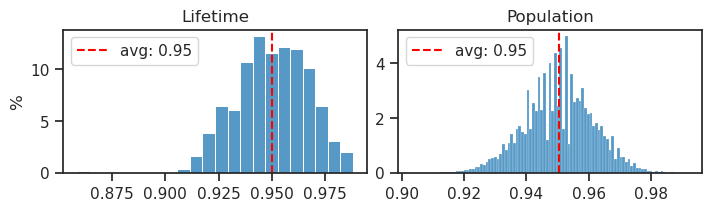

In [24]:
fig, axes = create_figure(1, 2, (7, 2), layout='constrained')

sns.histplot(lifetime, stat='percent', ax=axes[0])
sns.histplot(population, stat='percent', ax=axes[1])

for i, x2p in enumerate([lifetime, population]):
    _a, _med = np.nanmean(x2p), np.nanmedian(x2p)
    # axes[i].axvline(_med, color='g', ls='--', label=f'median: {_med:0.2f}')
    axes[i].axvline(_a, color='r', ls='--', label=f'avg: {_a:0.2f}')

add_legend(axes)
axes[0].set(title='Lifetime', ylabel='%')
axes[1].set(title='Population', ylabel='')
plt.show()

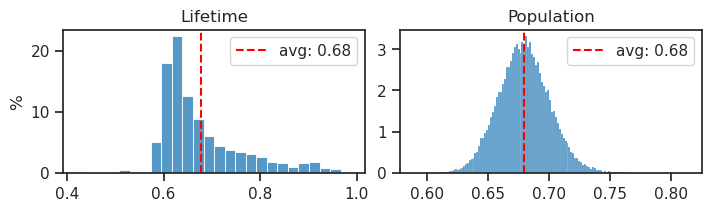

In [19]:
### Was: lin enc

In [25]:
tot_nspks = data['z'][:, ~dead].sum(1)
tot_firing = (data['z'][:, ~dead] > 0).mean(1)

min(tot_nspks), max(tot_nspks)

(5.0, 71.0)

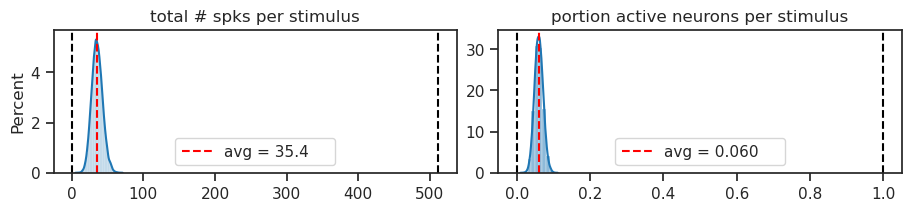

In [26]:
a = np.floor(min(tot_nspks) / 10) * 10
b = np.ceil(max(tot_nspks) / 10) * 10

fig, axes = create_figure(1, 2, (9, 2), layout='constrained')

sns.histplot(tot_nspks, bins=np.linspace(a, b, int(b - a) + 1), kde=True, stat='percent', ax=axes[0])
sns.histplot(tot_firing, bins=np.linspace(0, 1.0, 101), kde=True, stat='percent', ax=axes[1])

_a = tot_nspks.mean()
axes[0].axvline(_a, color='r', ls='--', label=f'avg = {_a:0.1f}    ')
_a = tot_firing.mean()
axes[1].axvline(_a, color='r', ls='--', label=f'avg = {_a:0.3f}    ')

axes[0].axvline(vae.cfg.n_latents, color='k', ls='--')
axes[1].axvline(1.0, color='k', ls='--')

axes[0].set_title('total # spks per stimulus')
axes[1].set(title='portion active neurons per stimulus', ylabel='')

for ax in axes.flat:
    ax.axvline(0, color='k', ls='--')
    ax.legend()
plt.show()

### Plot enc/dec weights

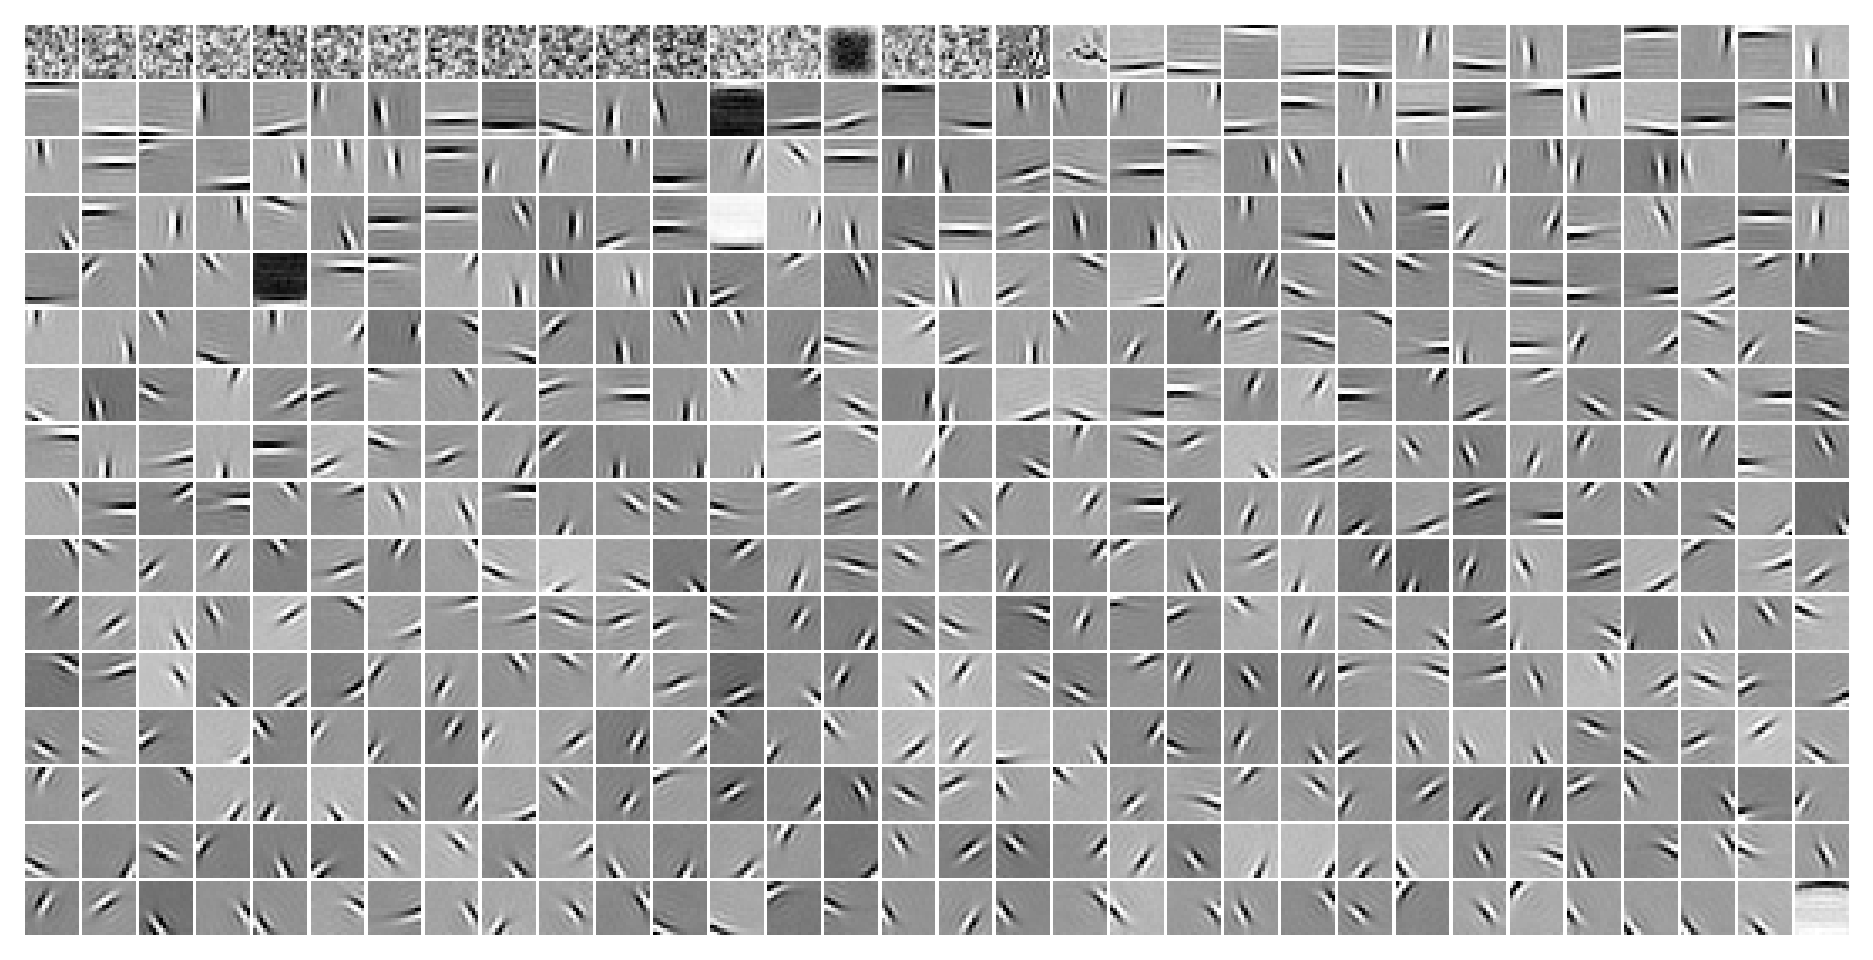

In [29]:
vae.show(dpi=250, order=np.argsort(tonp(vae.log_rates.squeeze())));

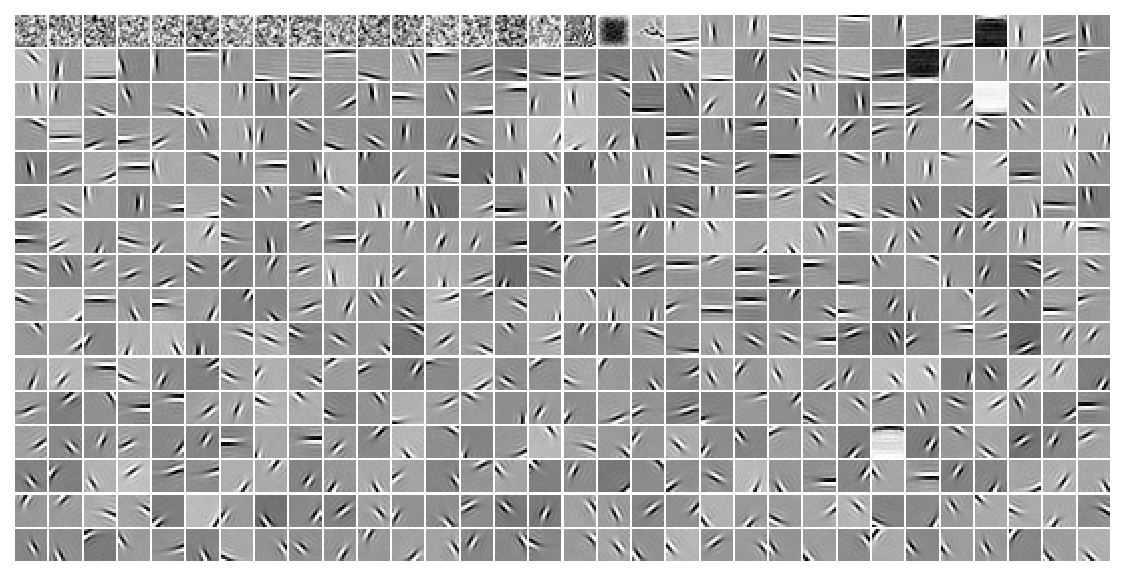

In [30]:
vae.show(dpi=150, order=np.argsort(loss['kl_diag']));

### Some more distributions

In [182]:
tr.model.temp, tr.cfg.kl_beta

(tensor(0.0505, device='cuda:1'), 1.0)

In [183]:
prior_rates = tonp(vae.log_rates)[:, ~dead].ravel()

mu, sd = sp_stats.norm.fit(prior_rates)
rv = sp_stats.norm(mu, sd)

xs = np.linspace(
    rv.ppf(1e-5),
    rv.ppf(1 - 1e-5),
    1000,
)
pdf = rv.pdf(xs)

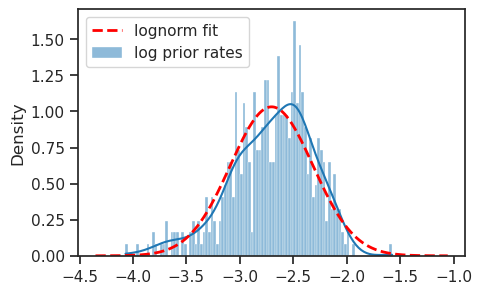

In [184]:
fig, ax = create_figure()

sns.histplot(prior_rates, stat='density', bins=100, kde=True, label='log prior rates', ax=ax)
ax.plot(xs, pdf, color='r', lw=2, ls='--', label='lognorm fit')
add_legend(ax)
plt.show()

In [185]:
ks = sp_stats.kstest(
    rvs=prior_rates,
    cdf=rv.cdf,
    alternative='two-sided',
)
print(ks)

KstestResult(statistic=0.05823782683979262, pvalue=0.06781824303316952, statistic_location=-2.6548612, 
statistic_sign=-1)

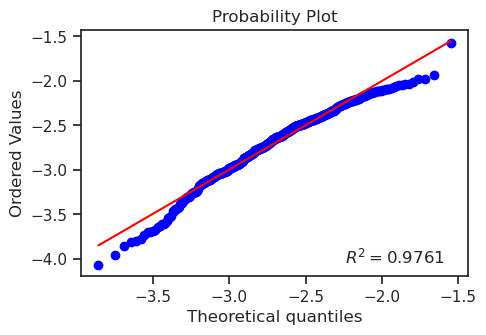

In [186]:
(osm, osr), (slope, intercept, r) = sp_stats.probplot(
    x=prior_rates,
    sparams=rv.args,
    rvalue=True,
    dist='norm',
    plot=plt,
)
plt.show()

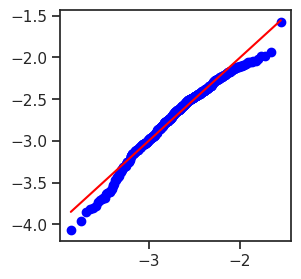

In [187]:
fig, ax = create_figure(1, 1, (3, 3))
plt.plot(osm, osr, marker='o', lw=0, color='b')
plt.plot(osm, osm * slope + intercept, color='r')
ax_square(ax)
plt.show()

In [39]:
vae.log_rates.squeeze()[dead]

tensor([-12.0487, -12.2910, -12.1376, -12.1709, -12.2497, -12.3060, -12.1271,
        -12.4379, -12.3024, -12.1505, -12.2350,  -8.9432, -12.1013, -12.0854,
        -11.9718, -12.0542, -12.1875, -11.9609, -12.1073], device='cuda:1',
       grad_fn=<IndexBackward0>)

In [40]:
loss['kl_diag'][dead]

array([9.68367573e-08, 7.43230189e-08, 7.06879106e-08, 9.42794358e-08,
       5.58984077e-08, 5.44873906e-08, 9.73316219e-08, 5.46527374e-08,
       7.02564478e-08, 9.77399068e-08, 7.97283946e-08, 2.38068082e-04,
       1.01421243e-07, 1.13139535e-07, 1.05583027e-07, 1.16913827e-04,
       6.11604563e-08, 9.93758840e-06, 1.05874221e-07], dtype=float32)

In [137]:
rng = get_rng(0)

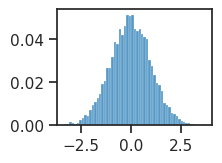

In [152]:
data_normal = rng.normal(0, 1, size=10000)

fig, ax = create_figure(1, 1, (2, 1.5))
sns.histplot(data_normal, stat='probability', ax=ax)
ax.set(ylabel='')
plt.show()

In [153]:
ks = sp_stats.kstest(
    rvs=data_normal,
    cdf=sp_stats.norm.cdf,
    # alternative='two-sided',
)
print(ks)

KstestResult(statistic=0.0053248648470106685, pvalue=0.9378428175296031, statistic_location=0.8697267872180541, 
statistic_sign=1)

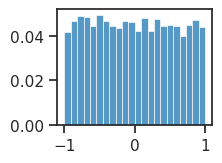

In [154]:
data_uniform = rng.uniform(-1, 1, size=10000)

fig, ax = create_figure(1, 1, (2, 1.5))
sns.histplot(data_uniform, stat='probability', ax=ax)
ax.set(ylabel='')
plt.show()

In [155]:
ks = sp_stats.kstest(
    rvs=data_uniform,
    cdf=sp_stats.norm.cdf,
    alternative='two-sided',
)
print(ks)

KstestResult(statistic=0.1588514909926151, pvalue=6.851134435354579e-221, statistic_location=-0.9979512841551124, 
statistic_sign=-1)

In [161]:
distributions = [
    "lognorm",
    "expon",
    "gamma",
    "chi2",
    "weibull_min",
    "pareto",
    "loggamma",
    "rayleigh",
    "invgamma"
]

In [162]:
%%time

from fitter import Fitter

f = Fitter(
    data=np.exp(prior_rates),
    distributions=distributions,
)
f.fit()

2024-05-02 17:55:36.110 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted pareto distribution with error=3408.981129)
2024-05-02 17:55:36.128 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=3408.259465)
2024-05-02 17:55:36.178 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=628.069993)
2024-05-02 17:55:36.236 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=728.338792)
2024-05-02 17:55:36.378 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted weibull_min distribution with error=619.297848)
2024-05-02 17:55:36.421 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=624.493292)
2024-05-02 17:55:36.577 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted loggamma distribution with error=686.055191)
2024-05-02 17:55:36.739 | INFO     | fitter.fitter:_fit_single_dis

CPU times: user 1.71 s, sys: 32.9 ms, total: 1.74 s
Wall time: 1.7 s


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
weibull_min,619.297848,37.193210,49.794737,inf,0.024912,9.119801e-01
gamma,624.493292,-32.584497,-19.982969,inf,0.032296,6.702646e-01
chi2,624.587144,-32.831944,-20.230416,inf,0.032528,6.615777e-01
lognorm,628.069993,-37.264679,-24.663152,inf,0.032870,6.487589e-01
loggamma,686.055191,152.704343,165.305870,inf,0.042499,3.261651e-01
rayleigh,728.338792,-73.165433,-64.764415,inf,0.061300,4.715452e-02
invgamma,1196.888516,-241.480124,-228.878597,inf,0.132147,5.739827e-08
expon,3408.259465,-230.097737,-221.696718,inf,0.266583,2.018196e-31
pareto,3408.981129,-228.083161,-215.481634,inf,0.266544,2.061441e-31


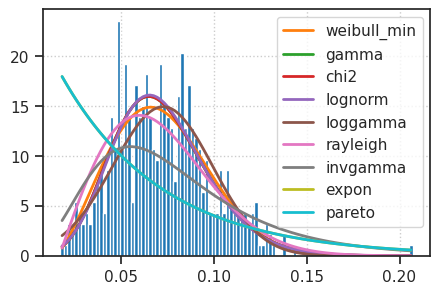

In [171]:
f.summary(Nbest=10)

In [173]:
rates['r*dr'].shape

(40000, 512)

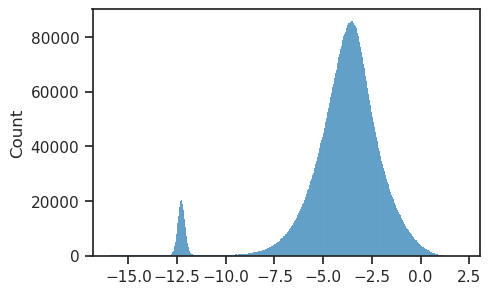

In [174]:
sns.histplot(np.log(rates['r*dr']).ravel());

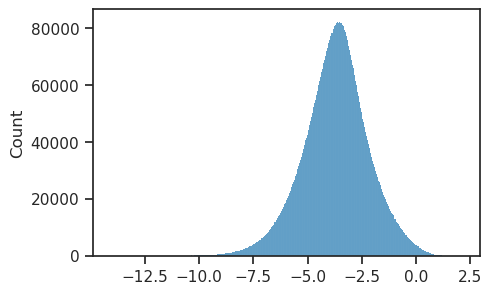

In [176]:
sns.histplot(np.log(rates['r*dr'][:, ~dead]).ravel());

In [177]:
posterior_log_rates = np.log(rates['r*dr'][:, ~dead]).ravel()

In [178]:
mu, sd = sp_stats.norm.fit(
    posterior_log_rates)
rv = sp_stats.norm(mu, sd)

xs = np.linspace(
    rv.ppf(1e-5),
    rv.ppf(1 - 1e-5),
    1000,
)
pdf = rv.pdf(xs)

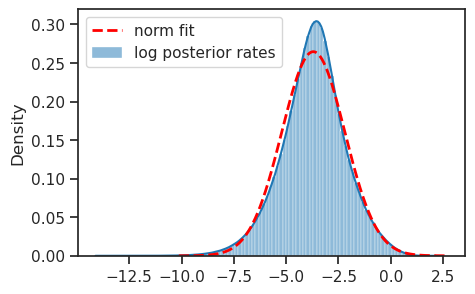

In [179]:
fig, ax = create_figure()

sns.histplot(posterior_log_rates, stat='density', bins=100, kde=True, label='log posterior rates', ax=ax)
ax.plot(xs, pdf, color='r', lw=2, ls='--', label='norm fit')
add_legend(ax)
plt.show()

In [180]:
ks = sp_stats.kstest(
    rvs=posterior_log_rates,
    cdf=rv.cdf,
    alternative='two-sided',
)
print(ks)

KstestResult(statistic=0.026637507066381627, pvalue=0.0, statistic_location=-4.305035, statistic_sign=-1)